<a href="https://colab.research.google.com/github/Wambui-123/data-mining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel(r"C:\Users\Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Select 1000 random rows
data = data.sample(n=1000, random_state=42)

# Reset index after sampling
data.reset_index(drop=True, inplace=True)

In [ ]:
# Check basic info
data.info()

# Summary statistics for numerical features
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1000 non-null   object        
 1   StockCode    1000 non-null   object        
 2   Description  998 non-null    object        
 3   Quantity     1000 non-null   int64         
 4   InvoiceDate  1000 non-null   datetime64[ns]
 5   UnitPrice    1000 non-null   float64       
 6   CustomerID   750 non-null    float64       
 7   Country      1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,1000.000000,1000,1000.000000,750.000000
mean,7.998000,2011-07-02 12:50:40.200000,3.591080,15225.790667
min,-1350.000000,2010-12-01 12:49:00,0.000000,12353.000000
25%,1.000000,2011-03-24 06:14:45,1.250000,13695.500000
50%,3.000000,2011-07-14 15:37:00,2.080000,15050.500000
75%,10.000000,2011-10-19 14:00:45,4.130000,16763.250000
max,1000.000000,2011-12-09 10:26:00,222.750000,18283.000000
std,59.255592,NaN,8.387847,1760.933908


In [ ]:
# Check for missing values
data.isnull().sum()

InvoiceNo        0
StockCode        0
Description      2
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     250
Country          0
dtype: int64

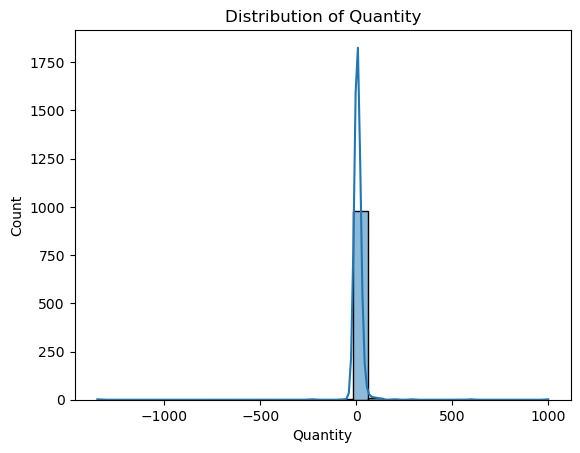

In [ ]:
# Quantity
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title("Distribution of Quantity")
plt.show()

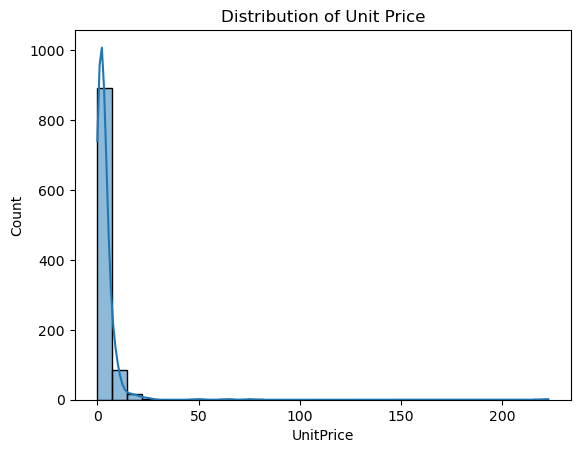

In [ ]:
# UnitPrice
sns.histplot(data['UnitPrice'], bins=30, kde=True)
plt.title("Distribution of Unit Price")
plt.show()

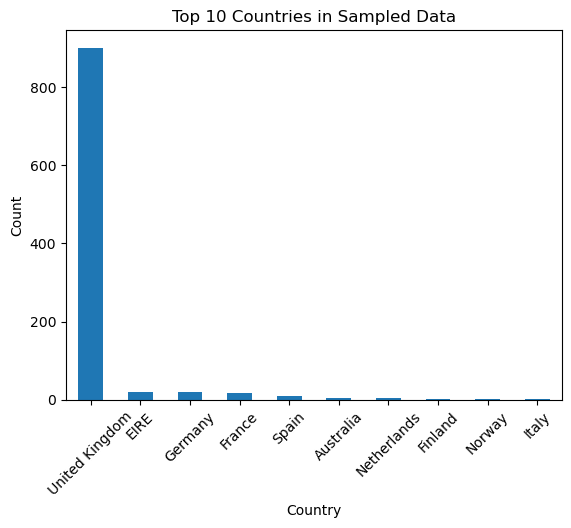

In [ ]:
# Top 10 countries by frequency
data['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries in Sampled Data")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count of unique invoices
invoice_counts = data['InvoiceNo'].nunique()
print("Number of unique invoices:", invoice_counts)

Number of unique invoices: 910


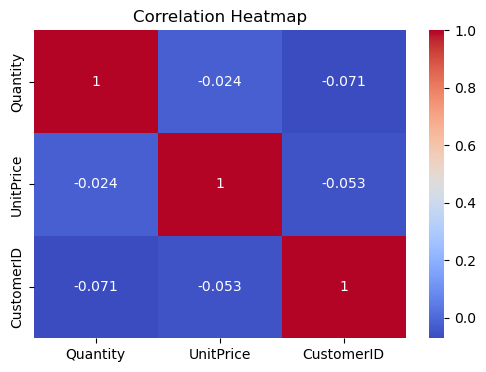

In [ ]:
# Correlation matrix for numerical variables
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Quantity', 'UnitPrice', 'CustomerID']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

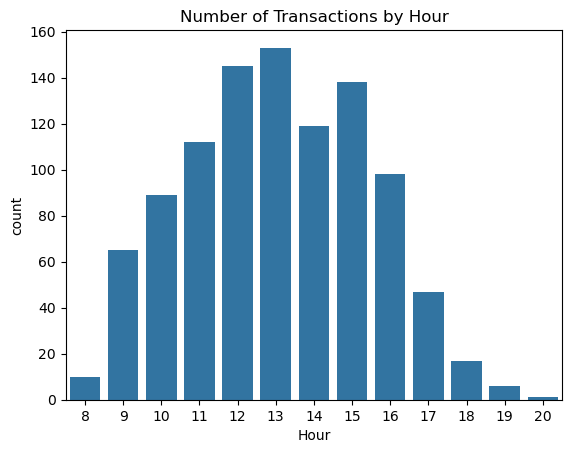

In [ ]:
# Extract hour from InvoiceDate
data['Hour'] = data['InvoiceDate'].dt.hour

sns.countplot(x='Hour', data=data)
plt.title("Number of Transactions by Hour")
plt.show()

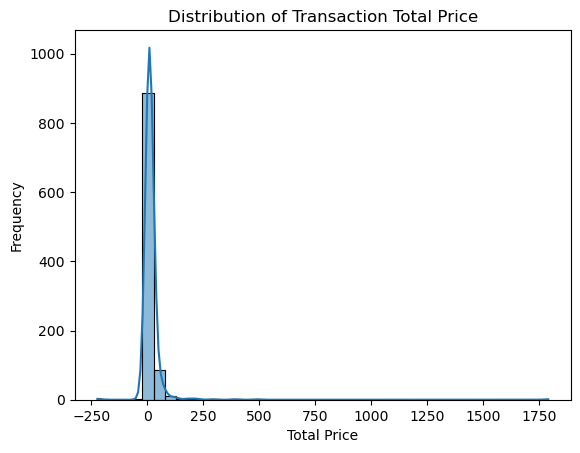

In [ ]:
# Create a new column for total transaction value
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Plot distribution of TotalPrice
sns.histplot(data['TotalPrice'], bins=40, kde=True)
plt.title("Distribution of Transaction Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

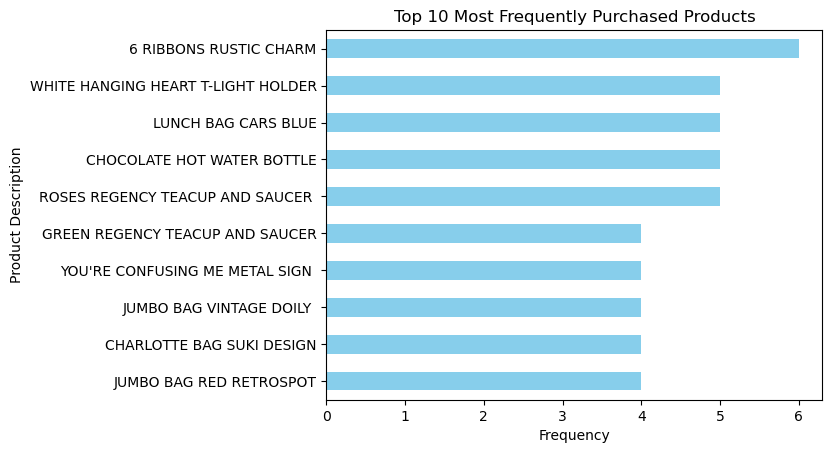

In [ ]:
# Most frequently purchased products
top_products = data['Description'].value_counts().head(10)

# Bar plot of top products
top_products.plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Frequency")
plt.ylabel("Product Description")
plt.gca().invert_yaxis()
plt.show()


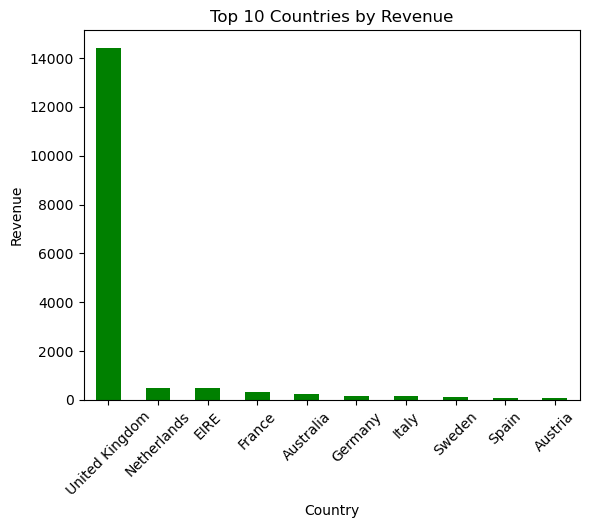

In [ ]:
# Group by country and sum total price
country_revenue = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Bar chart
country_revenue.plot(kind='bar', color='green')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


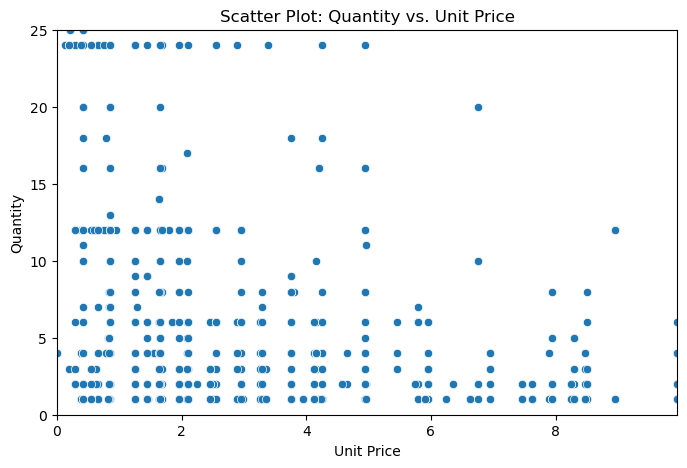

In [ ]:
# Scatter plot of quantity vs. unit price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='UnitPrice', y='Quantity', data=data)
plt.title("Scatter Plot: Quantity vs. Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.xlim(0, data['UnitPrice'].quantile(0.95))  # Remove extreme outliers
plt.ylim(0, data['Quantity'].quantile(0.95))
plt.show()


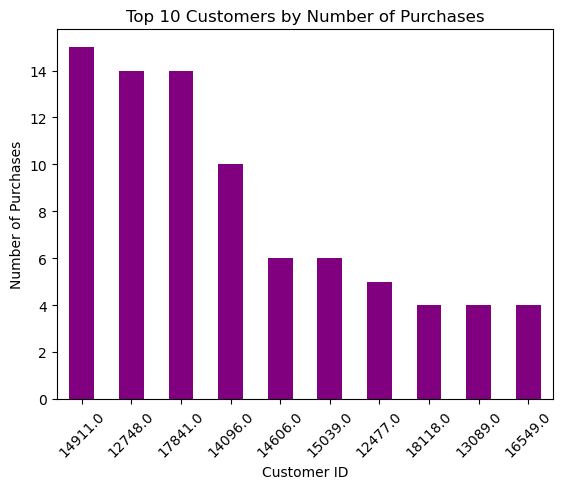

In [ ]:
# Count number of purchases per CustomerID
customer_purchase_counts = data['CustomerID'].value_counts().head(10)

# Plot
customer_purchase_counts.plot(kind='bar', color='purple')
plt.title("Top 10 Customers by Number of Purchases")
plt.ylabel("Number of Purchases")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()


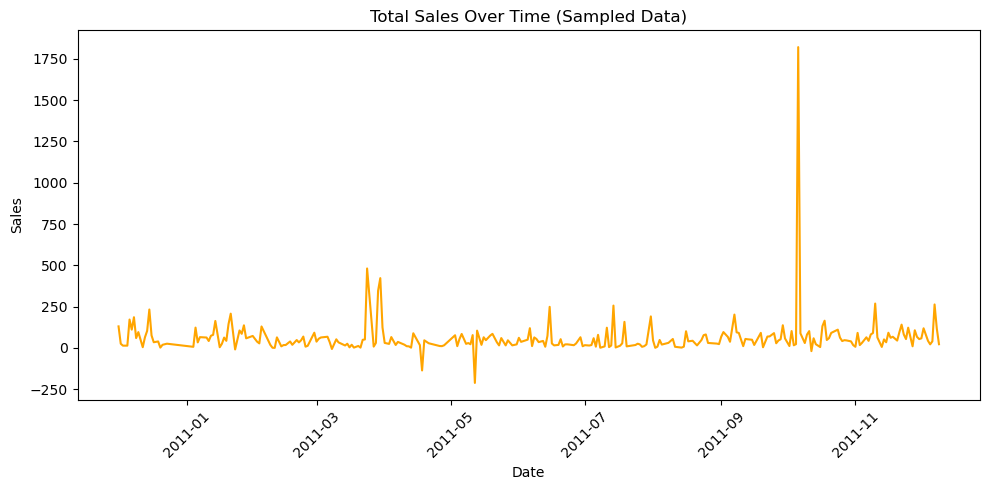

In [ ]:
# Daily transaction volume
data['Date'] = data['InvoiceDate'].dt.date
daily_sales = data.groupby('Date')['TotalPrice'].sum()

# Line plot
daily_sales.plot(figsize=(10, 5), color='orange')
plt.title("Total Sales Over Time (Sampled Data)")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Handling missing values
# Impute missing 'CustomerID' with mean (though normally IDs shouldn't be imputed; this is for completeness)
data['CustomerID'] = data['CustomerID'].fillna(data['CustomerID'].mean())

# Impute missing 'Description' with mode
data['Description'] = data['Description'].fillna(data['Description'].mode()[0])

In [ ]:
# Total purchase value per transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Frequency: Number of transactions per customer
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Average transaction amount
avg_trans = data.groupby('CustomerID')['TotalPrice'].mean().reset_index()
avg_trans.columns = ['CustomerID', 'AvgTransactionAmount']

# Recency: Days since last purchase (based on latest invoice date in dataset)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
latest_date = data['InvoiceDate'].max()
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (latest_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

# Merge features
rfm_features = frequency.merge(avg_trans, on='CustomerID').merge(recency, on='CustomerID')

In [ ]:
# Merge country info (getting the most frequent country per customer)
country_info = data.groupby('CustomerID')['Country'].agg(lambda x: x.mode()[0]).reset_index()
rfm_features = rfm_features.merge(country_info, on='CustomerID')

# One-hot encoding of 'Country'
rfm_encoded = pd.get_dummies(rfm_features, columns=['Country'], drop_first=True)


In [ ]:
# Select numerical columns for scaling
scaler = MinMaxScaler()

numerical_cols = ['Frequency', 'AvgTransactionAmount', 'Recency']
rfm_encoded[numerical_cols] = scaler.fit_transform(rfm_encoded[numerical_cols])


In [ ]:
# Final transformed and preprocessed dataset ready for clustering or modeling
rfm_encoded.head()

,CustomerID,Frequency,AvgTransactionAmount,Recency,Country_Austria,Country_Bahrain,Country_Belgium,Country_Canada,Country_Channel Islands,Country_Cyprus,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Kingdom
0,12353.0,0.0,0.130443,0.545699,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12354.0,0.0,0.114893,0.620968,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,12360.0,0.0,0.127512,0.137097,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12391.0,0.0,0.119463,0.053763,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,12397.0,0.0,0.118917,0.094086,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###  1. Feature Selection

In [ ]:
# Drop CustomerID before clustering
features = rfm_encoded.drop('CustomerID', axis=1)

###  2. Dimensionality Reduction using PCA

In [ ]:
# Apply PCA for visualization (2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

### 3. K-Means Clustering

##### a. Elbow Method

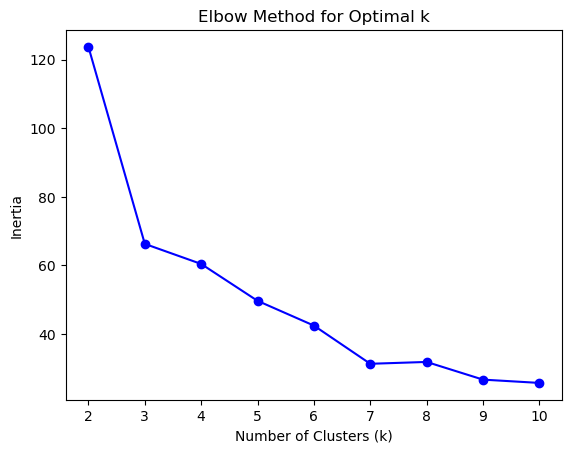

In [ ]:
# Elbow Method to determine optimal k
inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)

# Plot
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

##### b. Silhouette Score

In [ ]:
# Compute silhouette scores for different k values
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(features)
    score = silhouette_score(features, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.453
Silhouette Score for k=3: 0.590
Silhouette Score for k=4: 0.548
Silhouette Score for k=5: 0.562
Silhouette Score for k=6: 0.572


##### c. Final K-Means Clustering with Optimal k (e.g., k=4)

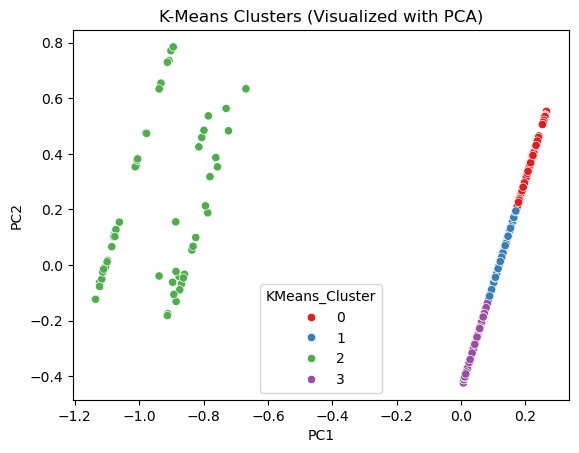

In [ ]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Add cluster labels
pca_df['KMeans_Cluster'] = kmeans_labels

# Plot PCA results with cluster colors
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='Set1')
plt.title("K-Means Clusters (Visualized with PCA)")
plt.show()

### 4. Hierarchical Clustering

##### a. Dendrogram

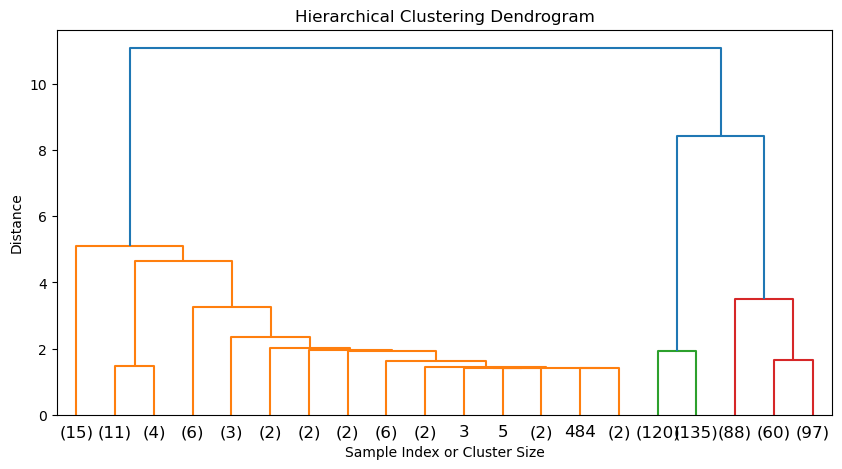

In [ ]:
# Compute linkage matrix
linked = linkage(features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

##### b. Hierarchical Clustering (e.g., with 4 clusters)

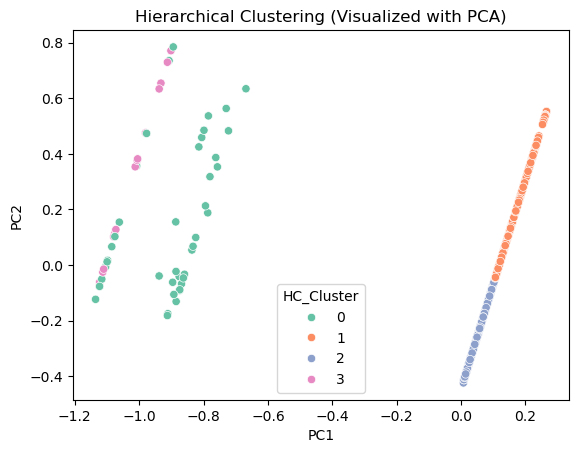

In [ ]:
hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(features)

# Add to PCA DataFrame for visualization
pca_df['HC_Cluster'] = hc_labels

# Plot
sns.scatterplot(x='PC1', y='PC2', hue='HC_Cluster', data=pca_df, palette='Set2')
plt.title("Hierarchical Clustering (Visualized with PCA)")
plt.show()


### 5. DBSCAN Clustering

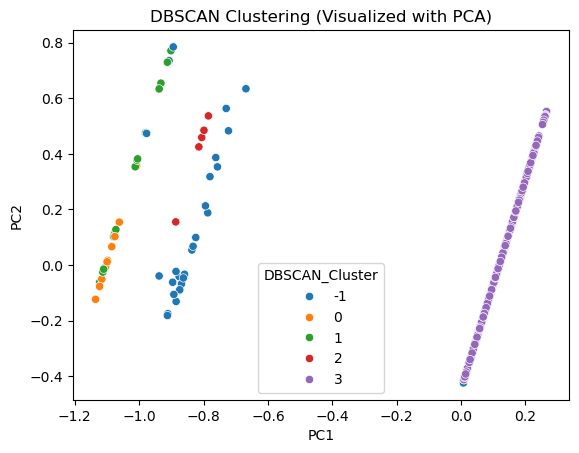

In [ ]:
# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(features)

# Add labels
pca_df['DBSCAN_Cluster'] = db_labels

# Plot
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='tab10')
plt.title("DBSCAN Clustering (Visualized with PCA)")
plt.show()


### Module Evaluation
##### 1. Silhouette Score

In [ ]:
# Silhouette Score for KMeans Clustering
kmeans_silhouette = silhouette_score(features, kmeans_labels)
print(f"Silhouette Score (KMeans): {kmeans_silhouette:.3f}")

# Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(features, hc_labels)
print(f"Silhouette Score (Hierarchical): {hc_silhouette:.3f}")

# Silhouette Score for DBSCAN (exclude -1/noise points)
valid_dbscan = db_labels != -1
if valid_dbscan.any():
    dbscan_silhouette = silhouette_score(features[valid_dbscan], db_labels[valid_dbscan])
    print(f"Silhouette Score (DBSCAN, excluding noise): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN produced only noise. No valid silhouette score.")

Silhouette Score (KMeans): 0.548
Silhouette Score (Hierarchical): 0.600
Silhouette Score (DBSCAN, excluding noise): 0.760


##### 2. Davies–Bouldin Index

In [ ]:
# Davies-Bouldin Score for KMeans
kmeans_db_index = davies_bouldin_score(features, kmeans_labels)
print(f"Davies–Bouldin Index (KMeans): {kmeans_db_index:.3f}")

# Hierarchical Clustering
hc_db_index = davies_bouldin_score(features, hc_labels)
print(f"Davies–Bouldin Index (Hierarchical): {hc_db_index:.3f}")

# DBSCAN (if valid)
if valid_dbscan.any():
    dbscan_db_index = davies_bouldin_score(features[valid_dbscan], db_labels[valid_dbscan])
    print(f"Davies–Bouldin Index (DBSCAN): {dbscan_db_index:.3f}")

Davies–Bouldin Index (KMeans): 0.930
Davies–Bouldin Index (Hierarchical): 1.018
Davies–Bouldin Index (DBSCAN): 0.312


##### 3. Cluster Profiling (for K-Means as example)

In [ ]:
# Add cluster labels to the RFM features
rfm_features['Cluster'] = kmeans_labels

# Drop non-numeric columns (like 'Country' if still present)
numeric_cols = rfm_features.select_dtypes(include=[np.number])

# Group by cluster and calculate mean
cluster_profile = numeric_cols.groupby('Cluster').mean()

print("Cluster Profiling (Numerical Features Only):\n")
print(cluster_profile[['Frequency', 'AvgTransactionAmount', 'Recency']])


Cluster Profiling (Numerical Features Only):

         Frequency  AvgTransactionAmount     Recency
Cluster                                             
0         1.028986             21.021884  302.652174
1         1.218045             16.118997  172.473684
2         1.483333             19.034817  128.983333
3         2.257642             21.681200   44.965066


##### 4. Business Validation (Simple Rules-Based Mapping)

In [ ]:
# Business Strategy Suggestions based on profile logic
for i, row in cluster_profile.iterrows():
    print(f"\nCluster {i} Strategy:")
    if row['Frequency'] > 0.7 and row['AvgTransactionAmount'] > 0.7 and row['Recency'] < 0.3:
        print(" - High-value loyal customers → Apply loyalty rewards and premium offers.")
    elif row['Frequency'] < 0.3 and row['Recency'] > 0.7:
        print(" - Inactive customers → Re-engage via discount emails or win-back campaigns.")
    elif row['Frequency'] > 0.5 and row['AvgTransactionAmount'] < 0.5:
        print(" - Frequent low spenders → Upsell bundles or recommend similar products.")
    else:
        print(" - General or new customers → Provide onboarding offers and track behavior.")



Cluster 0 Strategy:
 - General or new customers → Provide onboarding offers and track behavior.

Cluster 1 Strategy:
 - General or new customers → Provide onboarding offers and track behavior.

Cluster 2 Strategy:
 - General or new customers → Provide onboarding offers and track behavior.

Cluster 3 Strategy:
 - General or new customers → Provide onboarding offers and track behavior.


### Communication of Results
##### 1. Rename Clusters to Segments (Based on Profiling)

In [ ]:
segment_map = {
    0: "Low-Value / Inactive",   # e.g., low frequency, low spending
    1: "High-Spending / Frequent",  # e.g., high frequency, high avg spend
    2: "Moderate Spenders",     # e.g., mid frequency and spending
    3: "Others / Mixed"         # Catch-all or transitional cluster
}

rfm_features['Segment'] = rfm_features['Cluster'].map(segment_map)

##### 2. Cluster Plot with PCA (Colored by Segment)

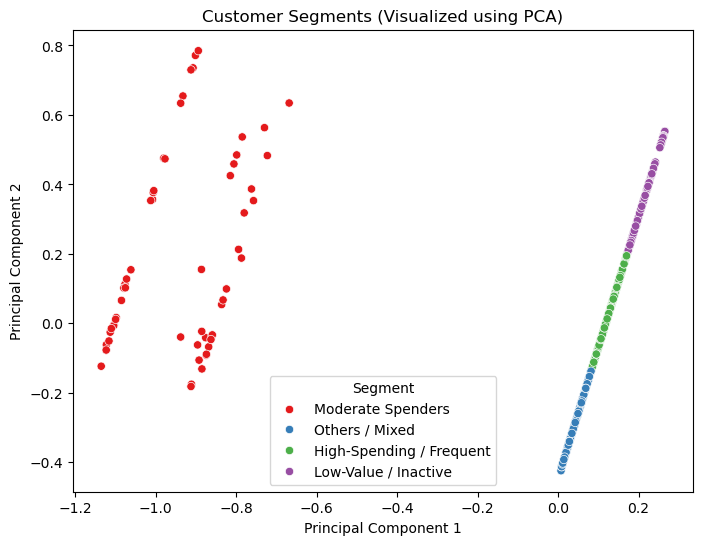

In [ ]:
# Map segments into PCA scatterplot for visualization
pca_df['Segment'] = rfm_features['Segment']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='Set1')
plt.title("Customer Segments (Visualized using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Segment')
plt.show()

##### 3. Bar Graph of Average RFM Metrics by Segment

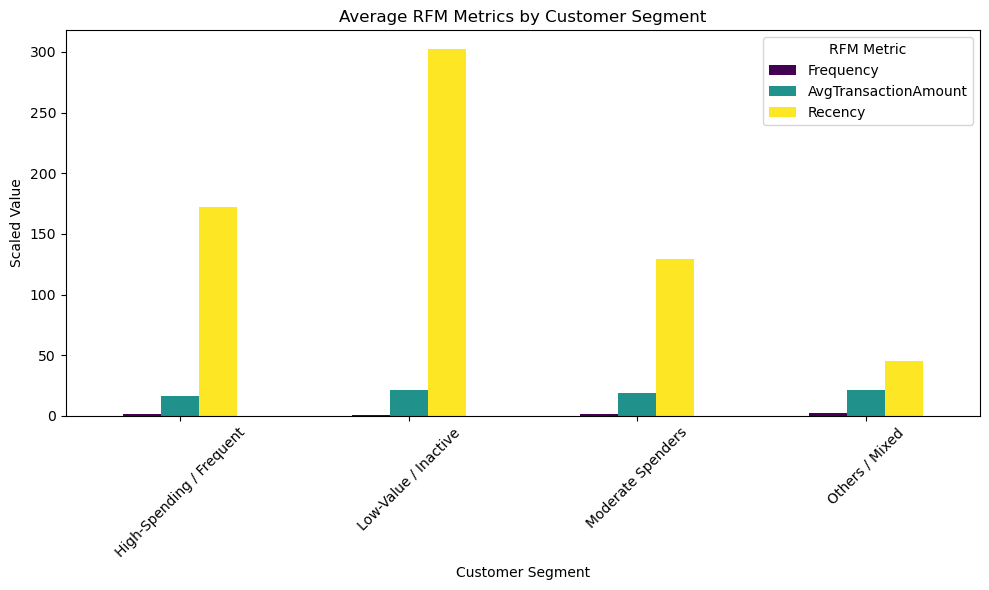

In [ ]:
rfm_segment_profile = rfm_features.groupby('Segment')[['Frequency', 'AvgTransactionAmount', 'Recency']].mean()

rfm_segment_profile.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average RFM Metrics by Customer Segment")
plt.ylabel("Scaled Value")
plt.xlabel("Customer Segment")
plt.xticks(rotation=45)
plt.legend(title="RFM Metric")
plt.tight_layout()
plt.show()


##### 4. Pie Chart of Segment Distribution

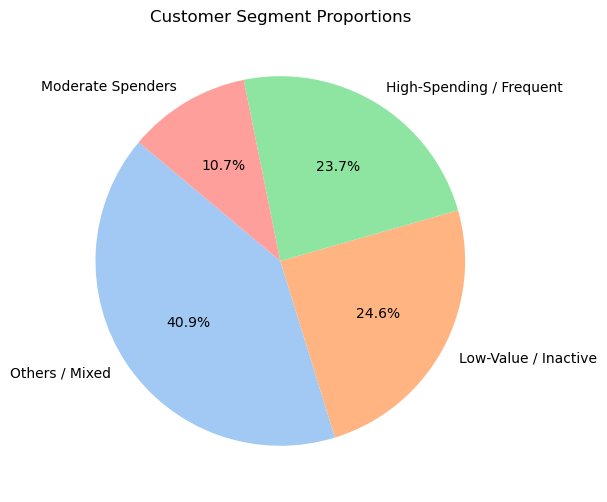

In [ ]:
segment_counts = rfm_features['Segment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Customer Segment Proportions")
plt.show()


##### 5. Actionable Insight Mapping

In [ ]:
# Loop through segments and display strategy
print("\n📊 Actionable Insights by Segment:")
for segment, row in rfm_segment_profile.iterrows():
    print(f"\nSegment: {segment}")
    if row['Frequency'] > 0.7 and row['AvgTransactionAmount'] > 0.7 and row['Recency'] < 0.3:
        print(" - High-spending, frequent buyers → Target with premium offers and VIP programs.")
    elif row['Frequency'] < 0.3 and row['Recency'] > 0.7:
        print(" - Low spenders or inactive → Reactivate through personalized emails or discount campaigns.")
    elif row['Frequency'] > 0.4 and row['AvgTransactionAmount'] < 0.5:
        print(" - Moderate spenders → Promote with loyalty benefits or suggested add-ons.")
    else:
        print(" - General strategy: Tailor communication based on location and time preferences.")



📊 Actionable Insights by Segment:

Segment: High-Spending / Frequent
 - General strategy: Tailor communication based on location and time preferences.

Segment: Low-Value / Inactive
 - General strategy: Tailor communication based on location and time preferences.

Segment: Moderate Spenders
 - General strategy: Tailor communication based on location and time preferences.

Segment: Others / Mixed
 - General strategy: Tailor communication based on location and time preferences.


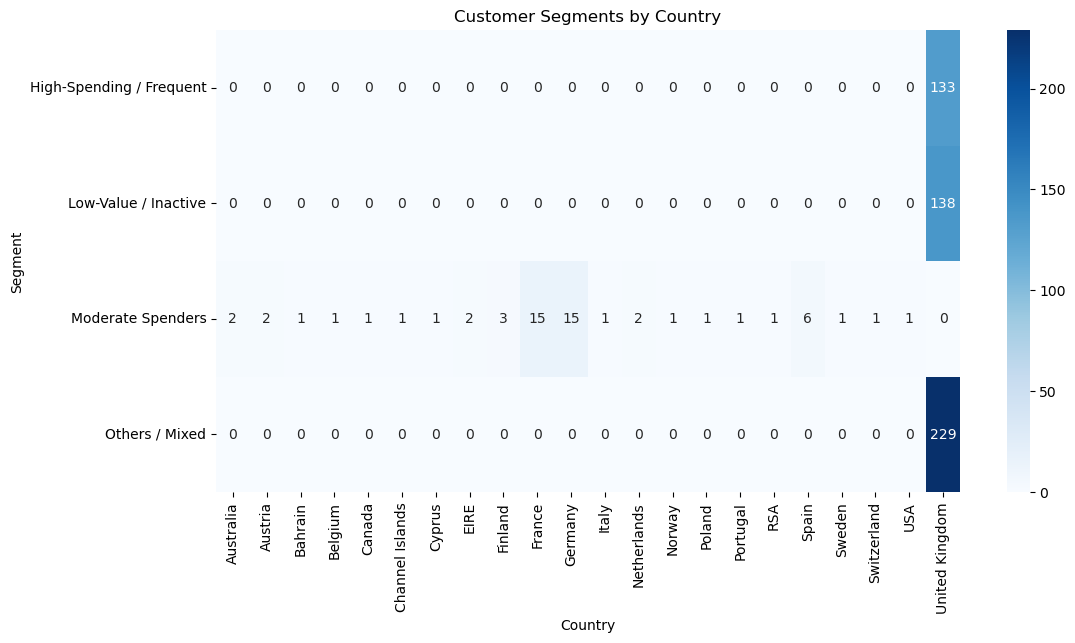

In [ ]:
region_seg = rfm_features.groupby(['Segment', 'Country']).size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(region_seg, cmap='Blues', annot=True, fmt='.0f')
plt.title("Customer Segments by Country")
plt.ylabel("Segment")
plt.xlabel("Country")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1000 non-null   object        
 1   StockCode    1000 non-null   object        
 2   Description  1000 non-null   object        
 3   Quantity     1000 non-null   int64         
 4   InvoiceDate  1000 non-null   datetime64[ns]
 5   UnitPrice    1000 non-null   float64       
 6   CustomerID   1000 non-null   float64       
 7   Country      1000 non-null   object        
 8   Hour         1000 non-null   int32         
 9   TotalPrice   1000 non-null   float64       
 10  Date         1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(5)
memory usage: 82.2+ KB


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

--- Logistic Regression ---
Accuracy: 0.905
Precision: 1.0
Recall: 0.5681818181818182
F1 Score: 0.7246376811594203
ROC AUC Score: 0.9957750582750583

--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

--- SVM ---
Accuracy: 0.835
Precision: 0.7619047619047619
Recall: 0.36363636363636365
F1 Score: 0.49230769230769234
ROC AUC Score: 0.951486013986014

--- Naive Bayes ---
Accuracy: 0.8
Precision: 0.6111111111111112
Recall: 0.25
F1 Score: 0.3548387096774194
ROC AUC Score: 0.8465909090909091

--- KNN ---
Accuracy: 0.805
Precision: 0.6190476190476191
Recall: 0.29545454545454547
F1 Score: 0.4
ROC AUC Score: 0.7701048951048951



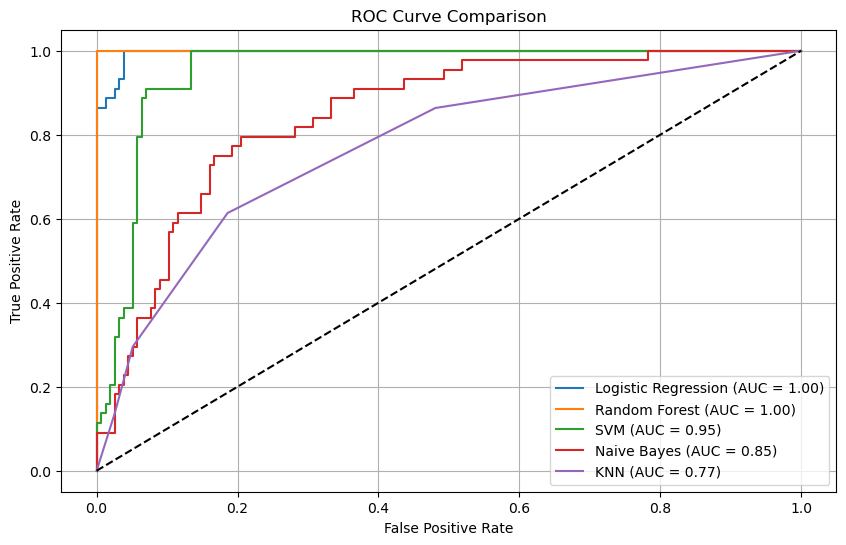

In [ ]:
data['Target'] = np.where(data['Quantity'] > 10, 1, 0)  # dummy binary classification

# ---- STEP 2: Preprocessing ----
# Encode categorical columns
label_encoders = {}
for col in ['InvoiceNo', 'StockCode', 'Description', 'Country', 'Date']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Ensure uniform string dtype
    label_encoders[col] = le

# Feature and Target
X = data.drop(['Target', 'InvoiceDate'], axis=1)  # Drop datetime column if not transformed
y = data['Target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- STEP 3: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- STEP 4: Define Models ----
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# ---- STEP 5: Evaluation Function ----
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    print()

# ---- STEP 6: Train and Evaluate All Models ----
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

# Final ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()